## 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함
- 변수 X, Y에 대한 정보를 가지고 일차 방적싱의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운것(실제 오류 평균보다 커지는 것을 보정)
- R square : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
    - 1에 가까울 수록 예측 정확도가 높음. 예측값 Variance / 실제값 Variance 

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [275]:
df = pd.read_excel('./dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [276]:
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [277]:
ndf.horsepower = ndf.horsepower.replace('?',np.nan)
ndf.dropna(subset=['horsepower'],inplace=True)
ndf.horsepower = ndf.horsepower.astype(float)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [278]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 11)


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

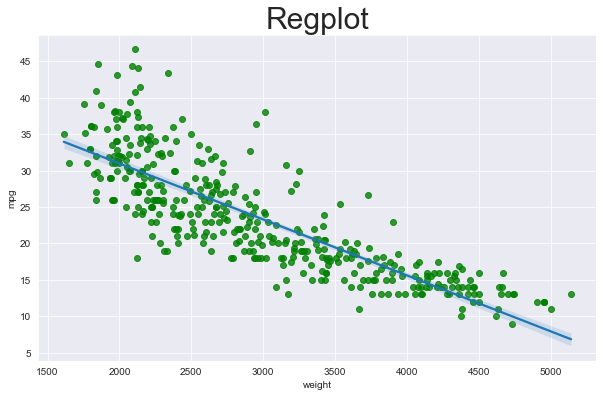

In [279]:
sns.set_style('darkgrid')

fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(ax=axes,x='weight',y='mpg',data=df,scatter_kws={'color':'green'})


In [280]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)


In [281]:
print('기울기 : ',lr.coef_)
print('절편 : ',lr.intercept_)

기울기 :  [-0.00762163]
절편 :  45.971217704757684


In [282]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mae : {round(mse,4)}, rmse : {round(rmse,4)}, r_square : {round(r_square,4)}')

mae : 22.169, rmse : 4.7084, r_square : 0.6411


<AxesSubplot:xlabel='mpg', ylabel='Density'>

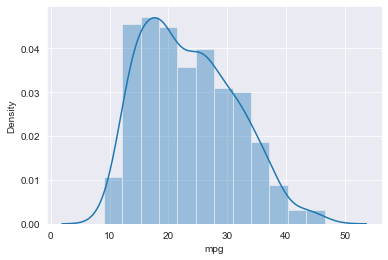

In [283]:
sns.distplot(y,kde=True)

<AxesSubplot:ylabel='Density'>

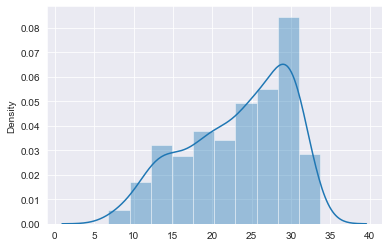

In [284]:
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

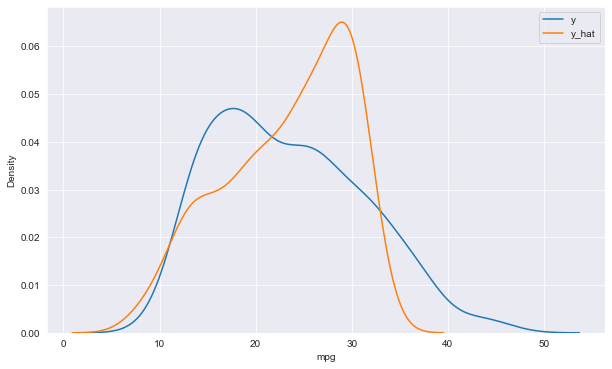

In [285]:
plt.figure(figsize=(10,6))
ax1 = sns.distplot(y,hist=False,label = 'y')
ax2 = sns.distplot(y_hat,hist=False,label = 'y_hat')
plt.legend()
plt.show()
plt.close()

## 다항 회귀분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀이며, 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [286]:
X_train.shape

(274, 1)

In [287]:
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

In [288]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [289]:
X_train_poly[:5]

array([[1.0000000e+00, 2.1200000e+03, 4.4944000e+06],
       [1.0000000e+00, 4.4990000e+03, 2.0241001e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06],
       [1.0000000e+00, 2.0450000e+03, 4.1820250e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06]])

In [290]:
# 차수 확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [291]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)

# preds = pr.predict(X_test_poly)
# r_square = r2_score(y_test,preds)

r_square = pr.score(X_test_poly,y_test)

print(r_square)

0.6368479947378759


In [292]:
print(pr.coef_)
print(pr.intercept_)

[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]
65.122741427334


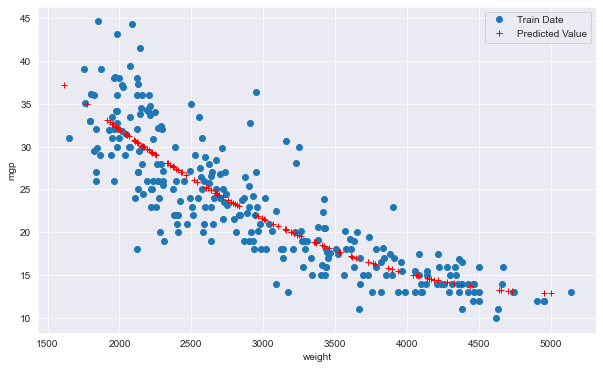

In [293]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Date')
ax.plot(X_test,y_hat_test,'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mgp')
plt.show()
plt.close()

In [294]:
# 0~1 사이 균일분포
import numpy as np
np.random.rand(100,1)

array([[0.26702827],
       [0.87862999],
       [0.79742602],
       [0.65845183],
       [0.85058173],
       [0.8672942 ],
       [0.70836298],
       [0.83701333],
       [0.69747146],
       [0.68014077],
       [0.61861138],
       [0.75271664],
       [0.15860511],
       [0.88087076],
       [0.87184353],
       [0.02924728],
       [0.82581675],
       [0.12886987],
       [0.33511885],
       [0.74350826],
       [0.1607599 ],
       [0.81796702],
       [0.83213418],
       [0.50746773],
       [0.00638587],
       [0.28703813],
       [0.61692692],
       [0.98118618],
       [0.63181353],
       [0.25980358],
       [0.6340057 ],
       [0.53998538],
       [0.7798454 ],
       [0.10698064],
       [0.7610279 ],
       [0.54126658],
       [0.962992  ],
       [0.34187217],
       [0.63262189],
       [0.93202811],
       [0.10250973],
       [0.93722849],
       [0.68788572],
       [0.06783706],
       [0.30096357],
       [0.70817209],
       [0.0673506 ],
       [0.582

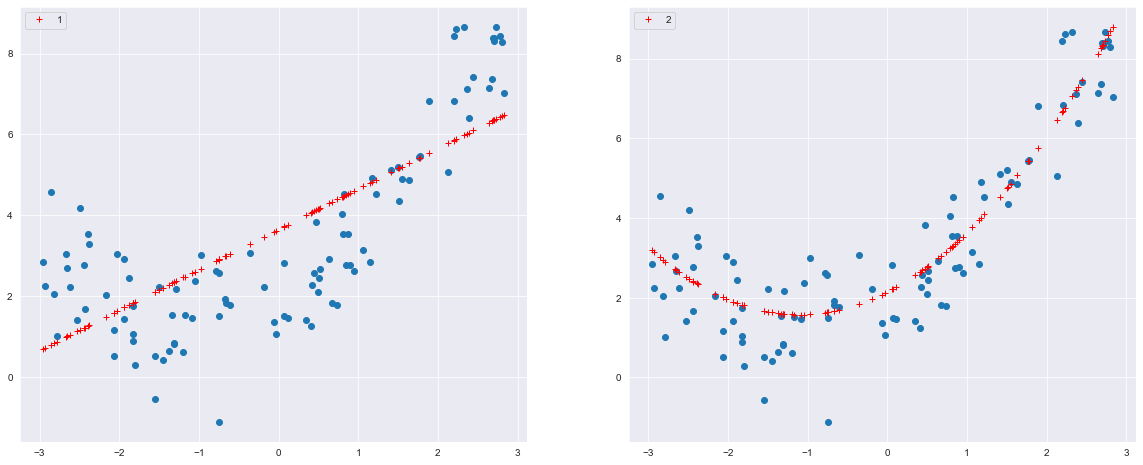

In [295]:
# [과제] X 데이터를 X_poly 테이터셋을 변환하여 2차 함수로 만들어진 데이터셋을 예측하고 시각화하세요.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
m = 500
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X+2 + np.random.randn(m,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)[:,1:]
X_test_poly = poly.fit_transform(X_test)[:,1:]

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.plot(X_test,y_test,'o')
ax.plot(X_test,pred,'r+',label = '1')
ax.legend()

lr.fit(X_train_poly,y_train)
pred = lr.predict(X_test_poly)

ax2.plot(X_test,y_test,'o')
ax2.plot(X_test,pred,'r+',label = '2')
ax2.legend()


## 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 성형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [296]:
df = pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [305]:
X = df.drop('mpg',axis=1)
y = df['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
poly = PolynomialFeatures(degree=2)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
round(r_square,4)

0.6939

In [298]:
# mse, rmse, r2_score, 기울기, 절편

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)

print('mse : ',mse)
print('rmse : ',rmse)
print('r_square : ',r_square)
print('기울기 : ',lr.coef_)
print('절편 : ',lr.intercept_)

mse :  17.330085628989956
rmse :  4.162941943985041
r_square :  0.6939048496695597
기울기 :  [-0.60691288 -0.03714088 -0.00522268]
절편 :  46.41435126963405


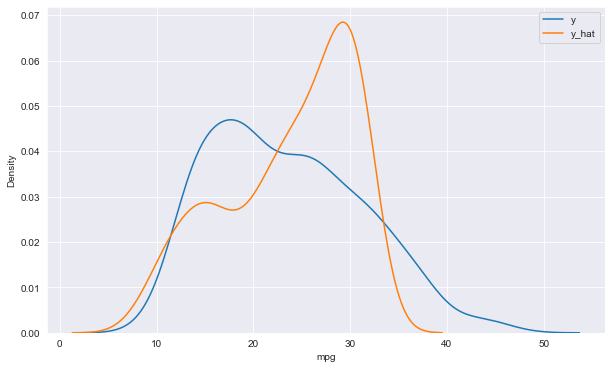

In [306]:
y_hat = lr.predict(X)
plt.figure(figsize=(10,6))
ax1 = sns.distplot(y,hist=False,label = 'y')
ax2 = sns.distplot(y_hat,hist=False,label = 'y_hat')
plt.legend()
plt.show()
plt.close()

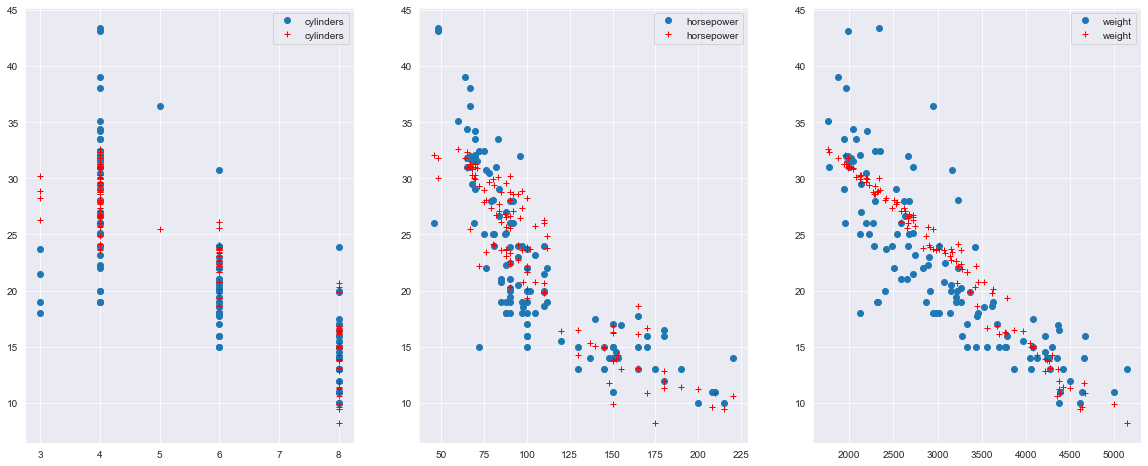

In [300]:
# [과제] y_test, y_hat을 하나의 그래프로 비교하여 시각화
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax.plot(X_test.cylinders,y_test,'o',label = 'cylinders')
ax.plot(X_test.cylinders,y_preds,'r+',label = 'cylinders')
ax.legend()
ax2.plot(X_test.horsepower,y_test,'o',label = 'horsepower')
ax2.plot(X_test.horsepower,y_preds,'r+',label = 'horsepower')
ax2.legend()
ax3.plot(X_test.weight,y_test,'o',label = 'weight')
ax3.plot(X_test.weight,y_preds,'r+',label = 'weight')
ax3.legend()
# plt.plot(X_test,y_test,'o',label = 'cylinders')
# plt.plot(X_test,y_preds,'r+',label = 'cylinders')

[과제] 아래 Boston 데이터셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

In [265]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [266]:
# null값 없음
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

<AxesSubplot:>

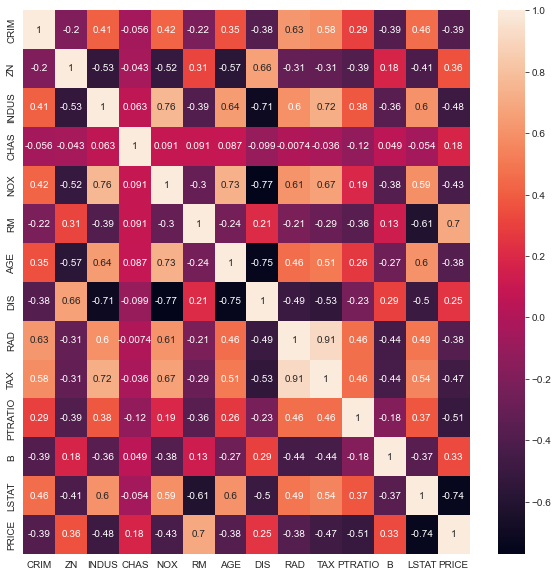

In [267]:
# 상관관계 파악
plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(),annot=True)

In [268]:
# CHAS 열은 다른 것들과 상관관계가 없어보이기에 파악
print(boston_df.CHAS.value_counts())
# 0값이 많고 상관관계가 적으니 삭제
boston_df.drop('CHAS',axis=1,inplace=True)

0.0    471
1.0     35
Name: CHAS, dtype: int64


In [269]:
# TAX와 RAD는 서로 너무 상관계수가 크기에 하나만 남기기로 결정
# PRICE와 더 상관관계에 있는 TAX만 남기고 RAD는 삭제
boston_df.drop('RAD',axis = 1,inplace = True)

In [270]:
# 데이터 학습 및 적용(다중선형회귀)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_df = boston_df.drop('PRICE',axis = 1)
y_df = boston_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X_df,y_df,test_size = 0.2, random_state = 1)
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [271]:
 # 성능평가
from sklearn.metrics import r2_score,mean_squared_error

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,pred)
print(f'mse = {mse}, rmse = {rmse}, r_square = {r_square}')

mse = 25.858372755491445, rmse = 5.085112855728124, r_square = 0.7383481148766472
